# preprocess

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6.5, 5))

In [4]:
import pandas as pd
train_xy = pd.read_csv("./train_xy_fm961.csv",index_col=["cust_group","cust_id"])
# train_x_pred = pd.read_csv("./train_x_y_pred_1.csv",index_col=["cust_group","cust_id"])
# train_xy = train_x_y.append(train_x_pred)
print(train_xy.shape)
X = train_xy.drop("y",axis=1).fillna(-1)
y = train_xy.y

(15118, 961)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y,random_state=222)
sfk = StratifiedKFold(n_splits=3,shuffle=True,random_state=111)

# define metrics

In [6]:
import itertools
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,confusion_matrix,auc

## confusion matrix

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

## learning_curve

In [8]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
                    estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## model evaluation info

In [9]:
def eval_info(model,test_y,y_pred_prob,
                  cm,classes=y.unique(),normalize=False):
    print("------%s classification_report------\n" % model.__class__.__name__,
          classification_report(test_y,y_pred))
    
    plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    print("auc:",roc_auc_score(test_y,y_pred_prob))
#     print("auc(y_pred):",roc_auc_score(test_y,y_pred))
    fpr, tpr, thresholds = roc_curve(test_y,y_pred_prob,pos_label=1)
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label='ROC curve(%f)' % auc(fpr, tpr),color='r')
    plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray',label='Luck')
    plt.title("%s ROC" % model.__class__.__name__)

# single model

## logistic

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best score: 0.861140 
 best model: LogisticRegression(C=5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)
------LogisticRegression classification_report------
              precision    recall  f1-score   support

          0       0.97      0.79      0.87      3542
          1       0.18      0.70      0.29       238

avg / total       0.92      0.78      0.83      3780

auc: 0.836625559314635
train_score: 0.7986417357558653 
 test_score: 0.7806878306878307
logistic model parameters shape: (1, 960) 
 count of non-zero elements: 139


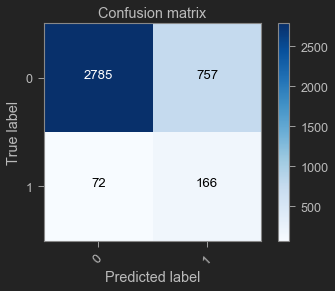

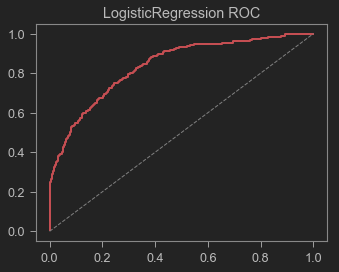

In [28]:
param_grid =  {
            'penalty':['l1'],#'l2'],
            'C':[0.035],
#             'solver':['newton-cg','lbfgs','sag'],
            'solver':['saga'],#'liblinear'],
#             'max_iter':[350],
            'class_weight':['balanced'],
            'random_state':[666],  
#             'fit_intercept':[False],
}
# param_grid =  {
#             'penalty':['l1'],#'l2'],
#             'C':[0.035,0.04],
#              'solver':['liblinear'],
#             'max_iter':[200], 
#             'class_weight':['balanced'],
#             'random_state':[666],      
# }
LR = GridSearchCV(LogisticRegression(),param_grid,cv=sfk,scoring='roc_auc')
LR.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (LR.best_score_, LR.best_estimator_))

LR_best = LR.best_estimator_
y_pred =LR_best.predict(test_x)
y_pred_prob = LR_best.predict_proba(test_x)[:,1]
train_score = LR_best.score(train_x,train_y)
test_score = LR_best.score(test_x,test_y)
cm = confusion_matrix(test_y,y_pred)

eval_info(LR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

print("logistic model parameters shape:",LR_best.coef_.shape,"\n",
     "count of non-zero elements:",np.count_nonzero(LR_best.coef_))

In [10]:
import pickle
with open("../best_models/LR_pkl.txt",'rb') as lr:
    lr = pickle.load(lr)
lr

LogisticRegression(C=0.035, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=350,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [70]:
# save model
import pickle
with open("./best_models/LR_pkl.txt",'wb') as f:
    pickle.dump(LR_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
LR_cv_auc = cross_val_score(LR_best,X,y,cv=5,scoring="roc_auc")
print("best_LR_cv_auc",LR_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best_LR_cv_auc [0.80543747 0.82687873 0.80942799 0.79248482 0.81046117]


F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [71]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = LR_best.predict(test_all)
y_pred_prob = LR_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_LR.csv",header=True)

0    7900
1    2100
dtype: int64


## Decision Tree

best score: 0.798075 
 best model: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=233,
            splitter='best')
------DecisionTreeClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.66      0.78      3542
          1       0.13      0.77      0.22       238

avg / total       0.92      0.66      0.75      3780

auc: 0.7881354122676738
train_score: 0.6627271123654965 
 test_score: 0.6626984126984127


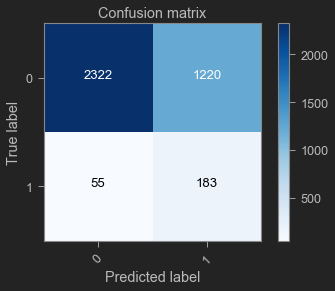

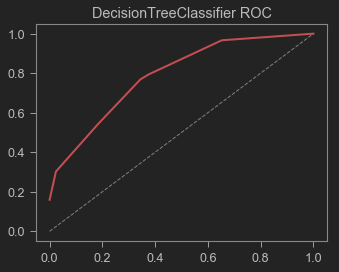

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion":['entropy'],
               "max_depth":[3],
                'max_features':[0.7],
#               "min_impurity_decrease":[0],
#              "min_samples_split":[2],
              "min_samples_leaf":[1], # 样本量不大不需管
#               "max_leaf_nodes":[19],
              "class_weight":["balanced"],
#               'min_weight_fraction_leaf':[0.04],
              'random_state':[233],
             }
DT = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=sfk,scoring='roc_auc')
DT.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (DT.best_score_, DT.best_estimator_))

DT_best = DT.best_estimator_
train_score = DT_best.score(train_x,train_y)
test_score = DT_best.score(test_x,test_y)
y_pred = DT_best.predict(test_x)
y_pred_prob = DT_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(DT_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [74]:
# save model
import pickle
with open("./best_models/DT_pkl.txt",'wb') as f:
    pickle.dump(DT_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
DT_cv_auc = cross_val_score(DT_best,X,y,cv=5,scoring="roc_auc")
print("best_DT_cv_auc:",DT_cv_auc)

best_DT_cv_auc: [0.726542   0.73438309 0.76924593 0.75697398 0.77645116]


In [75]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = DT_best.predict(test_all)
y_pred_prob = DT_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_DT.csv",header=True)

0    6513
1    3487
dtype: int64


## random forest

best score: 0.854168 
 best model: RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=222,
            verbose=0, warm_start=False)
------RandomForestClassifier classification_report------
              precision    recall  f1-score   support

          0       0.97      0.86      0.91      3542
          1       0.20      0.54      0.30       238

avg / total       0.92      0.84      0.87      3780

auc: 0.820167592728791
train_score: 0.8632915858176046 
 test_score: 0.8375661375661375


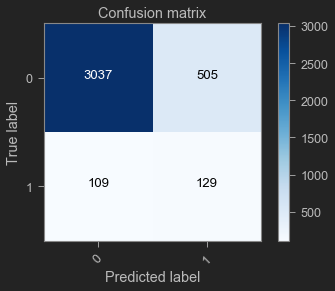

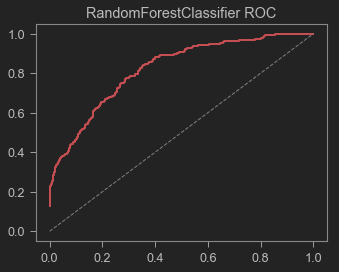

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
            'criterion':['entropy'],
            'n_estimators':[500],#140
            'class_weight':["balanced"],
#             'max_features':["sqrt"],
            'max_depth':[6],#4
#              "min_samples_split":[], # 样本量不大不需管
#               "min_samples_leaf":[], # 样本量不大不需管
#             "max_leaf_nodes":[13,15,20],
#             'min_impurity_decrease':[0],
#             'n_jobs':[-1],
            'random_state':[222],
             }

RF = GridSearchCV(RandomForestClassifier(),param_grid,cv=sfk,scoring='roc_auc')
RF.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (RF.best_score_, RF.best_estimator_))
RF_best = RF.best_estimator_
train_score = RF_best.score(train_x,train_y)
test_score = RF_best.score(test_x,test_y)
y_pred = RF_best.predict(test_x)
y_pred_prob = RF_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(RF_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [77]:
# save model
import pickle
with open("./best_models/RF_pkl.txt",'wb') as f:
    pickle.dump(RF_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
RF_cv_auc = cross_val_score(RF_best,X,y,cv=5,scoring="roc_auc")
print("best_RF_cv_auc:",RF_cv_auc)

best_RF_cv_auc: [0.78937931 0.81284831 0.8215067  0.77712105 0.80834714]


In [78]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = RF_best.predict(test_all)
y_pred_prob = RF_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_RF.csv",header=True)

0    7957
1    2043
dtype: int64


## extra tree

best score: 0.852081 
 best model: ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='entropy', max_depth=6, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=222,
           verbose=0, warm_start=False)
------ExtraTreesClassifier classification_report------
              precision    recall  f1-score   support

          0       0.97      0.82      0.89      3542
          1       0.19      0.62      0.29       238

avg / total       0.92      0.81      0.85      3780

auc: 0.821206743566992
train_score: 0.8215734697477509 
 test_score: 0.8076719576719577


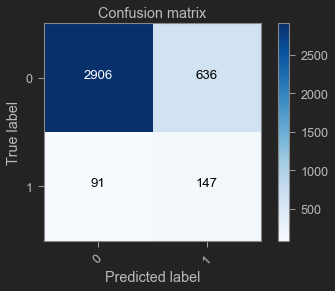

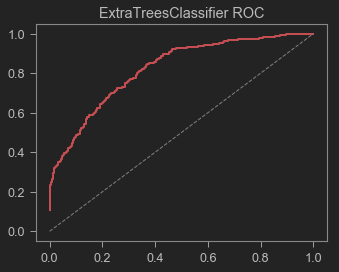

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
            'criterion':['entropy'],
            'n_estimators':[500], #150
            'class_weight':["balanced"],
#             'max_features':["sqrt"],
            'max_depth':[6], #5
#             'bootstrap':[True,False],
#              "min_samples_split":[], # 样本量不大不需管
#               "min_samples_leaf":[], # 样本量不大不需管
#             "max_leaf_nodes":[13,15,20],
#             'min_impurity_decrease':[0],
#             'n_jobs':[-1],
            'random_state':[222],
             }

ET = GridSearchCV(ExtraTreesClassifier(),param_grid,cv=sfk,scoring='roc_auc')
ET.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (ET.best_score_,ET.best_estimator_))

ET_best = ET.best_estimator_
train_score = ET_best.score(train_x,train_y)
test_score = ET_best.score(test_x,test_y)
y_pred = ET_best.predict(test_x)
y_pred_prob = ET_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(ET_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [80]:
# save model
import pickle
with open("./best_models/ET_pkl.txt",'wb') as f:
    pickle.dump(ET_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
ET_cv_auc = cross_val_score(ET_best,X,y,cv=5,scoring="roc_auc")
print("best_ET_cv_auc:",ET_cv_auc)

best_ET_cv_auc: [0.80135003 0.81024346 0.81221063 0.78116103 0.79102651]


In [81]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = ET_best.predict(test_all)
y_pred_prob = ET_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_ET.csv",header=True)

0    7964
1    2036
dtype: int64


## SVM

In [15]:
# svm_train_xy = pd.read_csv("F:./resample data/under_resample1.csv",index_col=['cust_id'])
# svm_y = svm_train_xy.y
# svm_X = svm_train_xy.drop('y',axis=1)
# svm_train_x,svm_test_x,svm_train_y,svm_test_y = train_test_split(svm_X,svm_y,stratify=svm_y)
# sfk = StratifiedKFold(n_splits=3)

best score: 0.701071 
 best model: SVC(C=0.5, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=True, random_state=520, shrinking=True,
  tol=0.001, verbose=False)
------SVC classification_report------
              precision    recall  f1-score   support

          0       0.96      0.96      0.96      3541
          1       0.16      0.13      0.14       172

avg / total       0.92      0.93      0.92      3713

auc: 0.7448477305714454
train_score: 0.9794397557909859 
 test_score: 0.9264745488823054


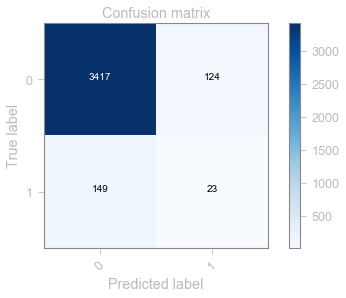

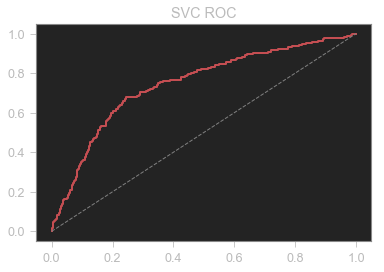

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
            'C':[0.5],
            'kernel':['rbf'],
            'class_weight':["balanced"],
            'gamma':[0.03],
#             'shrinking':[True],
            'probability':[True],
            'random_state':[520],
             }

SVC = GridSearchCV(SVC(),param_grid,cv=sfk,scoring='roc_auc')
SVC.fit(train_x,train_y)
print("best score: %f \n best model: %s" % (SVC.best_score_, SVC.best_estimator_))
SVC_best = SVC.best_estimator_
train_score = SVC_best.score(train_x,train_y)
test_score = SVC_best.score(test_x,test_y)
y_pred = SVC_best.predict(test_x)
y_pred_prob = SVC_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(SVC_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [83]:
# save model
import pickle
with open("./best_models/SVM_pkl.txt",'wb') as f:
    pickle.dump(SVC_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
SVC_cv_auc = cross_val_score(SVC_best,X,y,cv=5,scoring="roc_auc")
print("best_SVC_cv_auc",SVC_cv_auc)

best_SVC_cv_auc [0.73086348 0.72610346 0.71560673 0.68811788 0.753077  ]


## xgb-sklearn

best score: 0.867207 
 best model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.05, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=-1,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=8,
       reg_lambda=5, scale_pos_weight=14.857342657342658, seed=None,
       silent=True, subsample=0.8)


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


------XGBClassifier classification_report------
              precision    recall  f1-score   support

          0       0.97      0.82      0.89      3542
          1       0.20      0.65      0.31       238

avg / total       0.92      0.81      0.86      3780

auc: 0.8325045433193039
train_score: 0.8414182395484212 
 test_score: 0.8137566137566138


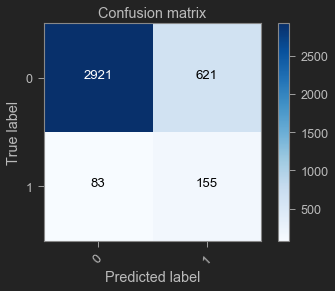

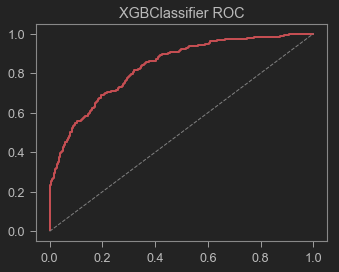

In [16]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'booster':['gbtree'],
    'objective': ['binary:logistic'],
    'n_estimators':[150],
    'max_depth':[3],
    'learning_rate':[0.05],
    'min_child_weight':[5],
    'gamma':[0.05],
    'subsample': [0.8],
    'colsample_bytree': [0.7],
    'reg_alpha': [8],
    'reg_lambda': [5],
    'scale_pos_weight':[float(len(train_y)-sum(train_y))/float(sum(train_y))],
    'random_state':[0],
#     'n_jobs': [-1],
    'missing': [-1],
    'silent':[True],
}

XGB = GridSearchCV(XGBClassifier(),param_grid,cv=sfk,scoring='roc_auc')#,iid=False)
XGB.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (XGB.best_score_, XGB.best_estimator_))

XGB_best = XGB.best_estimator_
y_pred = XGB_best.predict(test_x)
y_pred_prob = XGB_best.predict_proba(test_x)[:,1]
train_score = XGB_best.score(train_x,train_y)
test_score = XGB_best.score(test_x,test_y)
cm = confusion_matrix(test_y,y_pred)

eval_info(XGB_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [85]:
# save model
import pickle
with open("./best_models/XGB_pkl.txt",'wb') as f:
    pickle.dump(XGB_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
XGB_cv_auc = cross_val_score(XGB_best,X,y,cv=5,scoring="roc_auc")
print("best_XGB_cv_auc:",XGB_cv_auc)

best_XGB_cv_auc: [0.81029226 0.83021532 0.82612124 0.79244617 0.82930066]


In [86]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = XGB_best.predict(test_all)
y_pred_prob = XGB_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_XGB.csv",header=True)

0    9004
1     996
dtype: int64


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## xgb:raw interface

[0]	train-auc:0.839237
Will train until train-auc hasn't improved in 300 rounds.
[60]	train-auc:0.889911
[120]	train-auc:0.902581
[180]	train-auc:0.912721
[240]	train-auc:0.921445
[300]	train-auc:0.930043
[360]	train-auc:0.937779
[420]	train-auc:0.943805
[480]	train-auc:0.949979
[540]	train-auc:0.95557
[600]	train-auc:0.960001
[660]	train-auc:0.964325
[720]	train-auc:0.968029
[780]	train-auc:0.971526
[840]	train-auc:0.974559
[900]	train-auc:0.976944
[960]	train-auc:0.979419
[999]	train-auc:0.980853
------Booster classification_report------
              precision    recall  f1-score   support

          0       0.97      0.81      0.89      3542
          1       0.19      0.67      0.30       238

avg / total       0.92      0.81      0.85      3780

auc: 0.8348319564980142


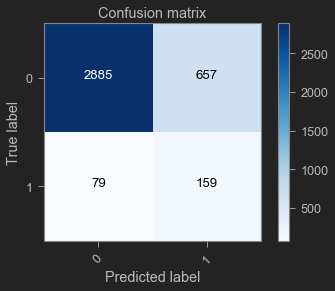

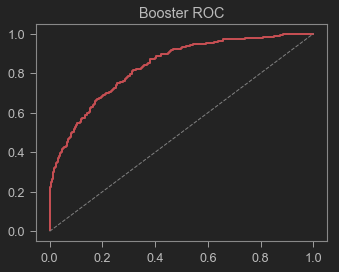

In [17]:
import xgboost as xgb
dtrain = xgb.DMatrix(train_x,label=train_y)
dtest = xgb.DMatrix(test_x)

params = {
            'booster':'gbtree',
            'objective': 'binary:logistic',
            'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
            'eval_metric': 'auc',
            'gamma':0.05,
            'max_depth':3,
            'alpha':7,
            'lambda':5,
            'subsample':0.8,
            'colsample_bytree':0.7,
#             'min_child_weight':5, 
            'eta': 0.02,
            'seed':0,
            'silent':1,
            'missing':-1,
        }
# xgb_cv = xgb.cv(params, dtrain, 
#            num_boost_round=1000, 
#            nfold=3, stratified=True,#folds=sfk
#            metrics='auc', maximize=True, 
#            early_stopping_rounds=500, 
#            as_pandas=True, verbose_eval=1, 
#            show_stdv=False, seed=0, shuffle=True)
xgb_model = xgb.train(params,dtrain,num_boost_round=1000,early_stopping_rounds=300,
                       evals=[(dtrain,"train")],verbose_eval=60,maximize=True)
y_pred_prob = xgb_model.predict(dtest,ntree_limit=272)
y_pred = np.where(y_pred_prob>0.5,1,0)

cm = confusion_matrix(test_y,y_pred)
eval_info(xgb_model,test_y,y_pred_prob,cm)

# xgb.plot_importance(xgb_model,max_num_features=20)
# plt.figure(figsize=(20,20))
# xgb.plot_tree(xgb_model,ax=plt,num_trees=5)

## GBDT

best score: 0.866025 
 best model: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features=0.7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              presort='auto', random_state=1, subsample=0.8, verbose=0,
              warm_start=False)
------GradientBoostingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.97      3542
          1       0.77      0.23      0.35       238

avg / total       0.94      0.95      0.93      3780

auc: 0.831247123355271
train_score: 0.9620744399364968 
 test_score: 0.9470899470899471


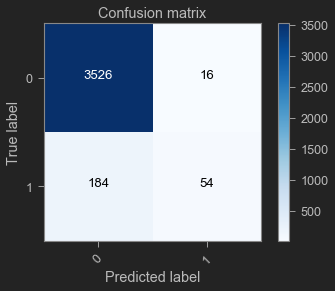

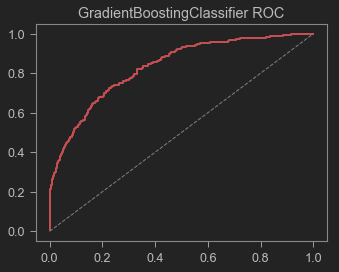

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
        'loss':['deviance'],
        'n_estimators':[400],
        'max_depth':[3],
        'learning_rate':[0.03],
#         'criterion':['friedman_mse'],#默认
        'subsample': [0.8],
        'max_features':[0.7],
#         "max_leaf_nodes":[8],
#         'min_impurity_decrease':[0],
        'random_state':[1],
}

GBDT = GridSearchCV(GradientBoostingClassifier(),param_grid,cv=sfk,scoring='roc_auc')
GBDT.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (GBDT.best_score_,GBDT.best_estimator_))

GBDT_best = GBDT.best_estimator_

train_score = GBDT_best.score(train_x,train_y)
test_score = GBDT_best.score(test_x,test_y)
y_pred = GBDT_best.predict(test_x)
y_pred_prob = GBDT_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(GBDT_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

In [88]:
# save model
import pickle
with open("./best_models/GBDT_pkl.txt",'wb') as f:
    pickle.dump(GBDT_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
GBDT_cv_auc = cross_val_score(GBDT_best,X,y,cv=5,scoring="roc_auc")
print("best_XGB_cv_auc:",GBDT_cv_auc)

best_XGB_cv_auc: [0.7978023  0.82175404 0.81778105 0.7931341  0.82255791]


In [89]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = GBDT_best.predict(test_all)
y_pred_prob = GBDT_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_GBDT.csv",header=True)

0    9995
1       5
dtype: int64


## MLP

best score: 0.866391 
 best model: MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(600,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=888,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
------MLPClassifier classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.97      3542
          1       1.00      0.21      0.35       238

avg / total       0.95      0.95      0.93      3780

auc: 0.8363278117571138
train_score: 0.9553713176927148 
 test_score: 0.9553713176927148


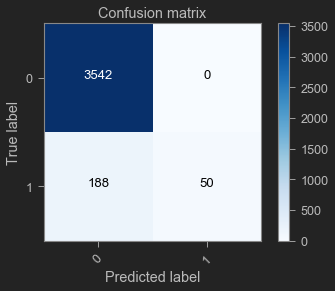

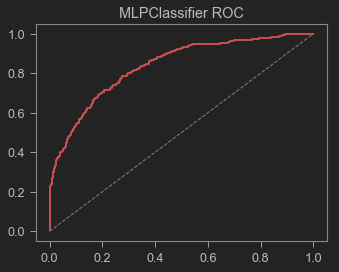

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes':[(600,)],
    'activation':['logistic'],#'relu'],
    'solver':['adam'],
#     'Note':
    'alpha':[0.1],
#     'batch_size':
    'learning_rate':['constant'],
#     'learning_rate_init':
#     'power_t':
#     'max_iter':[300],
#     'shuffle':
    'random_state':[888],
#     'tol':
#     'verbose':
#     'warm_start':
    'momentum':[0.9],
#     'nesterovs_momentum':
#     'early_stopping':[True],
#     'validation_fraction':
#     'beta_1':
#     'beta_2':
#     'epsilon':
}

MLP = GridSearchCV(MLPClassifier(),param_grid,cv=sfk,scoring='roc_auc')
MLP.fit(train_x,train_y)
print("best score: %f \n best model: %s" % (MLP.best_score_, MLP.best_estimator_))
MLP_best = MLP.best_estimator_
train_score = MLP_best.score(train_x,train_y)
test_score = MLP_best.score(train_x,train_y)
y_pred = MLP_best.predict(test_x)
y_pred_prob = MLP_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(MLP_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [68]:
# save model
# import pickle
# with open("./best_models/MLP_pkl.txt",'wb') as f:
#     pickle.dump(MLP_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
MLP_cv_auc = cross_val_score(MLP_best,X,y,cv=5,scoring="roc_auc")
print("best_MLP_cv_auc:",MLP_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


best_MLP_cv_auc: [0.80072592 0.78058131 0.80176028 0.74844443 0.75232209]


In [92]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = MLP_best.predict(test_all)
y_pred_prob = MLP_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_MLP.csv",header=True)

0    10000
dtype: int64


# adaboost

best score: 0.867555 
 best model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.02, n_estimators=700, random_state=999)
------AdaBoostClassifier classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.97      3542
          1       1.00      0.19      0.32       238

avg / total       0.95      0.95      0.93      3780

auc: 0.835789256414028
train_score: 0.9547539248544716 
 test_score: 0.9492063492063492


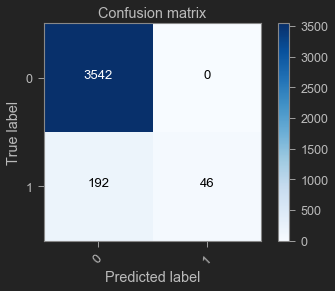

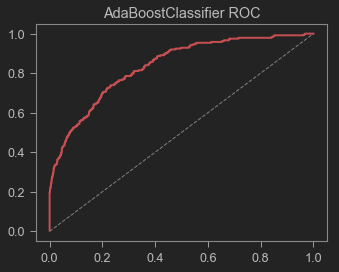

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
#     'base_estimator':[DT_best],#[RF_best],
    'n_estimators':[700],
    'learning_rate':[0.02],
    'random_state':[999],
}

ADAB = GridSearchCV(AdaBoostClassifier(),param_grid,cv=sfk,scoring="roc_auc")
ADAB.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (ADAB.best_score_,ADAB.best_estimator_))

ADAB_best = ADAB.best_estimator_
train_score = ADAB_best.score(train_x,train_y)
test_score = ADAB_best.score(test_x,test_y)
y_pred = ADAB_best.predict(test_x)
y_pred_prob = ADAB_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(ADAB_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

In [142]:
# save model
import pickle
with open("./best_models/ADAB_RF_pkl.txt",'wb') as f:
    pickle.dump(ADAB_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
ADAB_cv_auc = cross_val_score(ADAB_best,X,y,cv=5,scoring="roc_auc")
print("best_ADAB_cv_auc:",ADAB_cv_auc)

best_ADAB_cv_auc: [0.8104355  0.82646391 0.82957119 0.7907972  0.81782743]


In [143]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = ADAB_best.predict(test_all)
y_pred_prob = ADAB_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_ADAB_RF.csv",header=True)

0    9448
1     552
dtype: int64


# bagging XGB_best

------BaggingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.97      0.86      0.91      3542
          1       0.22      0.61      0.33       238

avg / total       0.92      0.84      0.87      3780

auc: 0.834530650204746
train_score: 0.8715822896454402 
 test_score: 0.8428571428571429


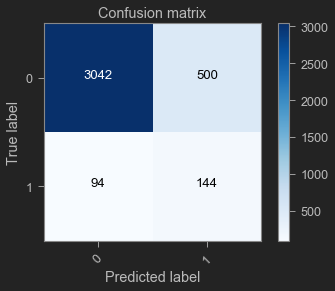

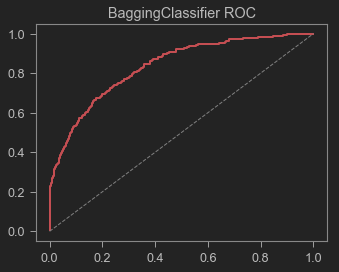

In [21]:
from sklearn.ensemble import BaggingClassifier

bagging_xgb = BaggingClassifier(XGB_best,n_estimators=10)
bagging_xgb.fit(train_x,train_y)

train_score =bagging_xgb.score(train_x,train_y)
test_score = bagging_xgb.score(test_x,test_y)
y_pred = bagging_xgb.predict(test_x)
y_pred_prob = bagging_xgb.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(bagging_xgb,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# bagging xgb:sklearn(vary params)

------XGBClassifier classification_report------
              precision    recall  f1-score   support

          0       0.97      0.83      0.90      3542
          1       0.21      0.65      0.32       238

avg / total       0.92      0.82      0.86      3780

auc: 0.8366267455598839


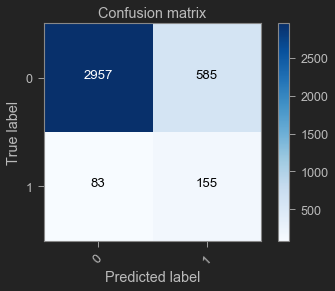

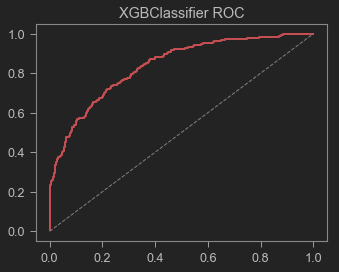

In [22]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [142,145,148] 
max_depth = [2,3,4] 
learning_rate = np.linspace(0.045,0.055,10) 
min_child_weight= [5,4,6] 
gamma = np.linspace(0.045,0.055,10)
subsample = [0.7,0.75,0.8,0.85]
colsample_bytree = [0.6,0.65,0.7,0.75]
reg_alpha =[6,7,8]
reg_lambda = [4,5,6]
random_state = np.arange(1000,10000,100)

np.random.shuffle(n_estimators)
np.random.shuffle(max_depth)
np.random.shuffle(learning_rate)
np.random.shuffle(min_child_weight)
np.random.shuffle(gamma)
np.random.shuffle(subsample)
np.random.shuffle(colsample_bytree)
np.random.shuffle(reg_alpha)
np.random.shuffle(reg_lambda)
np.random.shuffle(random_state)

prob_df = pd.DataFrame([],index=test_x.index)
for i in range(30):
    param_grid = {
        'booster':'gbtree',
        'objective': 'binary:logistic',
        'n_estimators':n_estimators[i%3],
        'max_depth':max_depth[i%3],
        'learning_rate':learning_rate[i%10],
        'min_child_weight':min_child_weight[i%3],
        'gamma':gamma[i%10],
        'subsample':subsample[i%4],
        'colsample_bytree': colsample_bytree[i%4],
        'reg_alpha':reg_alpha[i%3],
        'reg_lambda': reg_lambda[i%3],
        'scale_pos_weight':float(len(train_y)-sum(train_y))/float(sum(train_y)),
        'random_state':random_state[i],
#     'n_jobs': [-1],
        'missing': -1,
        'silent':True,
    }

#     bagging_xgb = BaggingClassifier(XGBClassifier().set_params(**param_grid),n_estimators=10)
    # bagging_xgb = BaggingClassifier(XGB_best,n_estimators=10)
#     bagging_xgb.fit(train_x,train_y)
    xgb_ = XGBClassifier().set_params(**param_grid)
    xgb_.fit(train_x,train_y)
    y_prob = xgb_.predict_proba(test_x)[:,1]
    y_prob_s = pd.Series(y_prob,index=test_x.index)
    prob_df = pd.concat([prob_df,y_prob_s],axis=1)

y_pred_prob = prob_df.mean(axis=1)
y_pred = (y_pred_prob>0.5)*1

cm = confusion_matrix(test_y,y_pred)
eval_info(xgb_,test_y,y_pred_prob,cm)

# print( "train_score:",train_score,"\n","test_score:",test_score)

# bagging dt

In [23]:
from sklearn.ensemble import BaggingClassifier
param_grid = {
    'base_estimator':[DT_best],#LR_best,SVC_best,GBDT_best],
    'n_estimators':[700],
    'max_samples':[0.8],
    'max_features':[0.7],
    'random_state':[777],
}

BAGG = GridSearchCV(BaggingClassifier(),param_grid,cv=sfk,scoring="roc_auc")
BAGG.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (BAGG.best_score_,BAGG.best_estimator_))
BAGG_best = BAGG.best_estimator_
train_score = BAGG_best.score(train_x,train_y)
test_score = BAGG_best.score(test_x,test_y)
y_pred = BAGG_best.predict(test_x)
y_pred_prob = BAGG_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(BAGG_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

KeyboardInterrupt: 

# bagging lr

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best score: 0.793553 
 best model: BaggingClassifier(base_estimator=LogisticRegression(C=0.08, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=350,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=777, verbose=0, warm_start=False)
------BaggingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.75      0.85      3541
          1       0.12      0.72      0.21       172

avg / total       0.94      0.75      0.82      3713

auc: 0.8180204645908724
train_score: 0.7475309750404022 
 test_score: 0.7460274710476703


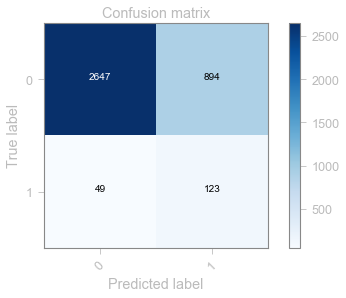

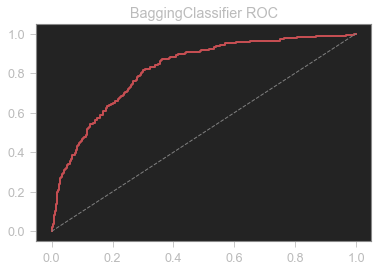

In [44]:
from sklearn.ensemble import BaggingClassifier
param_grid = {
    'base_estimator':[LR_best],#SVC_best,GBDT_best],
#     'n_estimators':[80],
#     'max_samples':[0.8],
#     'max_features':[0.7],
    'random_state':[777],
}

BAGG = GridSearchCV(BaggingClassifier(),param_grid,cv=sfk,scoring="roc_auc")
BAGG.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (BAGG.best_score_,BAGG.best_estimator_))
BAGG_best = BAGG.best_estimator_
train_score = BAGG_best.score(train_x,train_y)
test_score = BAGG_best.score(test_x,test_y)
y_pred = BAGG_best.predict(test_x)
y_pred_prob = BAGG_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(BAGG_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# voting 

## voting1

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
param_grid ={
    'voting':['soft'],
    'weights':[
#                [2,5,1,1,6,5],
               [2,1,2.5,2.5,4,3,5,6],
#                [2,1,3,3,5,5]
    ]
}

estimators = [ ('lr', LR_best),('mlp',MLP_best), 
               ('rf', RF_best),('et', ET_best) ,
               ('xgb',XGB_best),('gbdt',GBDT_best),
              ('ada',ADAB_best),('bagging_xgb',bagging_xgb)
             ]

voting1 =GridSearchCV(VotingClassifier(estimators),param_grid,cv=sfk,scoring="roc_auc")
voting1.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (voting1.best_score_,voting1.best_estimator_))
voting1_best = voting1.best_estimator_
train_score = voting1_best.score(train_x,train_y)
test_score = voting1_best.score(test_x,test_y)
y_pred = voting1_best.predict(test_x)
y_pred_prob = voting1_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(voting1_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

In [24]:
# predict
test_all = pd.read_csv("./test_all_poly45.csv",index_col=['cust_group','cust_id'])

y_pred = voting1_best.predict(test_all)
y_pred_prob = voting1_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("../predict/pred_result_voting1_poly45.csv",header=True)

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0    9813
1     187
dtype: int64


## voting2

In [ ]:
param_grid ={
    'voting':['soft'],
    'weights':[
            [1,2,3,6,5],
    ]
}

estimators = [ ('mlp',MLP_best), ('rf', RF_best),('gbdt',GBDT_best),
               ('bagging_xgb',bagging_xgb),('adaboost',ADAB_best)
             ]

voting2 =GridSearchCV(VotingClassifier(estimators),param_grid,cv=sfk,scoring="roc_auc")
voting2.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (voting2.best_score_,voting2.best_estimator_))
voting2_best = voting2.best_estimator_
train_score = voting2_best.score(train_x,train_y)
test_score = voting2_best.score(test_x,test_y)
y_pred = voting2_best.predict(test_x)
y_pred_prob = voting2_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(voting2_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

## voting3

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
param_grid ={
    'voting':['soft'],
    'weights':[
            [2,1,3]
    ]
}

estimators = [ ('mlp',MLP_best), 
               ('gbdt',GBDT_best),
               ('ada',ADAB_best)
             ]

voting3 =GridSearchCV(VotingClassifier(estimators),param_grid,cv=sfk,scoring="roc_auc")
voting3.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (voting3.best_score_,voting3.best_estimator_))

voting3_best = voting3.best_estimator_
train_score = voting3_best.score(train_x,train_y)
test_score = voting3_best.score(test_x,test_y)
y_pred = voting3_best.predict(test_x)
y_pred_prob = voting3_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(voting3_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

## predict train_x_nolabel

In [ ]:
train_x_nolabel = pd.read_csv("./train_x_poly45.csv",index_col=['cust_group','cust_id'])
voting_y_pred = voting3_best.predict(train_x_nolabel)
voting_y_pred_prob = voting3_best.predict_proba(train_x_nolabel)

In [ ]:
train_x_nolabel_pred_v = pd.concat([pd.Series(voting_y_pred),pd.DataFrame(voting_y_pred_prob)],axis=1)
train_x_nolabel_pred_v.index=train_x_nolabel.index              
train_x_nolabel_pred_v.columns = ['y_pred','y_pred_prob0','y_pred_prob1']
train_x_nolabel_pred_v.head()

In [ ]:
# cond_v = (train_x_nolabel_pred_v['y_pred_prob0']>0.7)|(train_x_nolabel_pred_v['y_pred_prob1']>0.7)
# train_x_nolabel_pred_v[cond_v].y_pred.value_counts()
train_x_nolabel_pred_v.y_pred.value_counts()

## predict test_all

In [78]:
# save model
# import pickle
# with open("../best_models/voting_pkl.txt",'wb') as f:
#     pickle.dump(voting_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
voting_cv_auc = cross_val_score(voting_best,X,y,cv=5,scoring="roc_auc")
print("best_voting_cv_auc:",voting_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best_voting_cv_auc: [0.80731237 0.83536578 0.83057603 0.80233226 0.82995251]


In [73]:
# predict
test_all = pd.read_csv("./test_all_poly45.csv",index_col=['cust_group','cust_id'])

y_pred = voting2_best.predict(test_all)
y_pred_prob = voting2_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("../predict/pred_result_voting2_poly45.csv",header=True)

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0    9889
1     111
dtype: int64


# stacking

## stacking1

In [ ]:
from mlxtend.classifier import StackingClassifier

meta_classifier = LogisticRegression()#.set_params(**LR_best.get_params())
classifiers = [LR_best,RF_best,ET_best,bagging_xgb,XGB_best,MLP_best,GBDT_best,ADAB_best]
# ET_best,RF_best,
# voting_best,
stacking1 = StackingClassifier(classifiers=classifiers,meta_classifier=meta_classifier,
                             use_probas = True,average_probas=True) #
stacking1.fit(train_x,train_y)
train_score = stacking1.score(train_x,train_y)
test_score = stacking1.score(test_x,test_y)
y_pred = stacking1.predict(test_x)
y_pred_prob = stacking1.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(stacking1,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

In [ ]:
# predict
test_all = pd.read_csv("./test_all_poly45.csv",index_col=['cust_group','cust_id'])

y_pred = stacking1.predict(test_all)
y_pred_prob = stacking1.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("../predict/pred_stacking1_poly45.csv",header=True)

## stacking2

In [ ]:
from mlxtend.classifier import StackingClassifier

meta_classifier = LogisticRegression()#.set_params(**LR_best.get_params())
classifiers = [MLP_best,GBDT_best,ADAB_best]
# ET_best,RF_best,
# voting_best,
stacking2 = StackingClassifier(classifiers=classifiers,meta_classifier=meta_classifier,
                             use_probas = True,average_probas=True) #
stacking2.fit(train_x,train_y)
train_score = stacking2.score(train_x,train_y)
test_score = stacking2.score(test_x,test_y)
y_pred = stacking2.predict(test_x)
y_pred_prob = stacking2.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(stacking2,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

## stacking3

In [ ]:
from mlxtend.classifier import StackingClassifier

meta_classifier = LogisticRegression()#.set_params(**LR_best.get_params())
classifiers = [MLP_best,GBDT_best,ADAB_best]
# ET_best,RF_best,
# voting_best,
stacking3 = StackingClassifier(classifiers=classifiers,meta_classifier=meta_classifier,
                             use_probas = True,average_probas=False) #
stacking3.fit(train_x,train_y)
train_score = stacking3.score(train_x,train_y)
test_score = stacking3.score(test_x,test_y)
y_pred = stacking3.predict(test_x)
y_pred_prob = stacking3.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(stacking3,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

## predict train_x_nolabel

In [ ]:
train_x_nolabel = pd.read_csv("./train_x_poly45.csv",index_col=['cust_group','cust_id'])
stacking_y_pred = stacking1.predict(train_x_nolabel)
stacking_y_pred_prob = stacking1.predict_proba(train_x_nolabel)

In [ ]:
train_x_nolabel_pred_s = pd.concat([pd.Series(stacking_y_pred),pd.DataFrame(stacking_y_pred_prob)],axis=1)
train_x_nolabel_pred_s.index=train_x_nolabel.index              
train_x_nolabel_pred_s.columns = ['y_pred','y_pred_prob0','y_pred_prob1']
train_x_nolabel_pred_s.head()

In [ ]:
cond_s = (train_x_nolabel_pred_s['y_pred_prob0']>0.7)|(train_x_nolabel_pred_s['y_pred_prob1']>0.7)
train_x_nolabel_pred_s[cond_s].y_pred.value_counts()

## train_x_nolabel predictions concat

In [ ]:
# pred_concat = pd.concat([train_x_nolabel_pred_s[cond_s],train_x_nolabel_pred_v[cond_v]],join='inner',axis=1)
pred_concat = pd.concat([train_x_nolabel_pred_s[cond_s],train_x_nolabel_pred_v],join='inner',axis=1)
print("y_pred_s=y_pred_v:",pred_concat.iloc[:,0].equals(pred_concat.iloc[:,3]))
print(pred_concat.iloc[:,0].value_counts())
print(pred_concat.iloc[:,3].value_counts())
# n = (len(y)-sum(y))/sum(y) * sum(pred_concat.iloc[:,0]==1)
# sample_y0 = pred_concat[pred_concat.iloc[:,0]==0].sample(n=int(n),random_state=20)
# y_pred_1 = pred_concat[pred_concat.iloc[:,0]==1]
y_pred_1 = pred_concat[(pred_concat.iloc[:,0]==pred_concat.iloc[:,3]) & (pred_concat.iloc[:,0]==1)]
y_pred_1.shape

In [ ]:
from sklearn.utils import shuffle
train_x_nolabel_pred = train_x_nolabel.loc[y_pred_1.index]
train_x_nolabel_pred.insert(0,'y',0)
train_x_nolabel_pred['y'][y_pred_1.index] = 1
shuffle(train_x_nolabel_pred).to_csv("./train_x_y_pred_1x.csv")
train_x_nolabel_pred.head()

In [ ]:
train_x_nolabel_pred['y'].value_counts()

In [ ]:
shuffle(train_x_y.append(train_x_nolabel_pred)).to_csv("./train_xy_y.csv")

In [85]:
# save model
import pickle
with open("../best_models/stacking_pkl.txt",'wb') as f:
    pickle.dump(stacking,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
stacking_cv_auc = cross_val_score(stacking,X,y,cv=5,scoring="roc_auc")
print("stacking_cv_auc:",stacking_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


stacking_cv_auc: [0.80835853 0.83479121 0.82825974 0.80151808 0.83075381]


In [86]:
test_all = pd.read_csv("./test_all_poly45.csv",index_col=['cust_group','cust_id'])

y_pred = stacking.predict(test_all)
y_pred_prob = stacking.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("../predict/pred_result_stacking_poly45.csv",header=True)

0    9988
1      12
dtype: int64


# label propagation

## 传播测试

------------------标签传播评估----------------------
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      7954
          1       0.13      0.13      0.13       390

avg / total       0.92      0.92      0.92      8344

-----true labels of unlabeled y:-----
 0    7954
1     390
Name: y, dtype: int64
-----predict labels of unlabeled y:-----
 0    7966
1     378
dtype: int64


F:\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:294: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


<module 'matplotlib.pyplot' from 'F:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

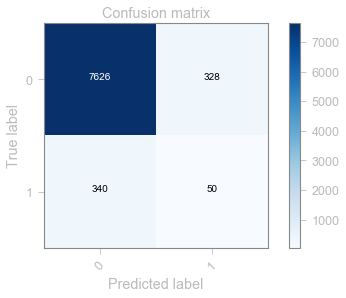

In [36]:
from sklearn.semi_supervised.label_propagation import LabelSpreading

n_total_samples = len(X)
n_labeled_points = 8000
unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
y_train = y.copy()
y_train[unlabeled_indices] = -1

# lp_model = LabelSpreading(kernel='rbf',gamma=0.3,alpha=0.1,max_iter=50)
lp_model = LabelSpreading(kernel='knn',n_neighbors=3,alpha=0.1,max_iter=50)
lp_model.fit(X, y_train)

print("------------------标签传播评估----------------------")
predicted_labels = lp_model.transduction_[unlabeled_indices]
true_labels = y[unlabeled_indices]
cm = confusion_matrix(true_labels, predicted_labels)

print(classification_report(true_labels, predicted_labels))
print("-----true labels of unlabeled y:-----\n",true_labels.value_counts())
print("-----predict labels of unlabeled y:-----\n",pd.Series(predicted_labels).value_counts())
plot_confusion_matrix(cm,classes=y.unique())

## 预测train_x_nolabel

In [37]:
from sklearn.semi_supervised.label_propagation import LabelSpreading
from sklearn.utils import shuffle
train_x_nolabel = pd.read_csv("./train_x_poly45.csv",index_col=['cust_group','cust_id'])
train_x_nolabel.insert(0,'y',-1)

In [38]:
np.random.RandomState(7)
train_all = shuffle(train_xy.append(train_x_nolabel))
X_all = train_all.drop('y',axis=1)
y_all = train_all.y
unlabeled_indices = train_x_nolabel.index

# lp_model = LabelSpreading(kernel='rbf',gamma=0.3,alpha=0.1,max_iter=50)
lp_model = LabelSpreading(kernel='knn',n_neighbors=2,alpha=0.1,max_iter=50)
lp_model.fit(X_all, y_all)

print("------------------标签传播情况----------------------")
predicted_labels = pd.Series(lp_model.transduction_,index=y_all.index)[unlabeled_indices]
predicted_labels.value_counts()

------------------标签传播情况----------------------


F:\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:294: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


Exception: cannot handle a non-unique multi-index!

In [ ]:
train_x_nolabel['y'] = predicted_labels

In [ ]:
train_x_nolabel.to_csv("./train_x_lp.csv")

# GBDT+LR

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y)
train_x,train_x_lr,train_y,train_y_lr = train_test_split(train_x,train_y,stratify=train_y)

from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

GBDT_best.fit(train_x,train_y)
one_hot.fit(GBDT_best.apply(train_x)[:,:,0])
train_x_lr = one_hot.transform(GBDT_best.apply(train_x_lr)[:,:,0])
test_x_lr = one_hot.transform(GBDT_best.apply(test_x)[:,:,0])
                               
param_grid =  {
            'penalty':['l1'],#'l2'],
            'C':[0.06],
#             'solver':['newton-cg','lbfgs','sag'],#l2
            'solver':['liblinear'],#,'saga',],#l1
            'max_iter':[50],
            'class_weight':['balanced'],
#             'fit_intercept':[True],
            'random_state':[666],      
}

GBLR = GridSearchCV(LogisticRegression(),param_grid,cv=sfk,scoring='roc_auc')
GBLR.fit(train_x_lr,train_y_lr)

print("best score: %f \n best model: %s" % (GBLR.best_score_, GBLR.best_estimator_))
GBLR_best = GBLR.best_estimator_

train_score = GBLR_best.score(train_x_lr,train_y_lr)
test_score = GBLR_best.score(test_x_lr,test_y)
y_pred = GBLR_best.predict(test_x_lr)
y_pred_prob = GBLR_best.predict_proba(test_x_lr)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(GBLR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

# xgb+lr

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

dtrain = xgb.DMatrix(train_x,label=train_y)
dtest = xgb.DMatrix(test_x)
one_hot = OneHotEncoder()

params = {
            'booster':'gbtree',
            'objective': 'binary:logistic',
            'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
            'eval_metric': 'auc',
            'gamma':0.05,
            'max_depth':3,
            'alpha':7,
            'lambda':5,
            'subsample':0.8,
            'colsample_bytree':0.6,
            'min_child_weight':5, 
            'eta': 0.02,
            'seed':0,
            'silent':1,
            'missing':-1,
        }

xgb_model = xgb.train(params,dtrain,num_boost_round=500,early_stopping_rounds=304,
                       evals=[(dtrain,"train")],verbose_eval=20,maximize=True)

train_leaf = xgb_model.predict(dtrain,ntree_limit=304,pred_leaf=True)
test_leaf = xgb_model.predict(dtest,ntree_limit=304,pred_leaf=True)

train_leaf_hot = one_hot.fit_transform(train_leaf)
test_leaf_hot = one_hot.transform(test_leaf)
     

param_grid =  {
            'penalty':['l2'],
            'C':[0.06],
            'solver':['lbfgs'],#['newton-cg','sag'],#l2
#             'solver':['liblinear'],#,'saga',],#l1
            'max_iter':[80],
            'class_weight':['balanced'],
#             'fit_intercept':[True],
            'random_state':[666],      
}

xgbLR = GridSearchCV(LogisticRegression(),param_grid,cv=sfk,scoring='roc_auc')
xgbLR.fit(train_leaf_hot,train_y)

print("best score: %f \n best model: %s" % (xgbLR.best_score_,xgbLR.best_estimator_))
xgbLR_best = xgbLR.best_estimator_

train_score = xgbLR_best.score(train_leaf_hot,train_y)
test_score = xgbLR_best.score(test_leaf_hot,test_y)
y_pred = xgbLR_best.predict(test_leaf_hot)
y_pred_prob = xgbLR_best.predict_proba(test_leaf_hot)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(xgbLR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

# FM

In [ ]:
# from fastFM import sgd
# fm = sgd.FMClassification(n_iter=1000, init_stdev=0.1, l2_reg_w=0,
#                               l2_reg_V=0, rank=2, step_size=0.1)
# fm.fit(train_x,train_y)
# y_pred = fm.predict(test_x)
# y_pred_prob = fm.predict_proba(test_x)

# cm = confusion_matrix(test_y,y_pred)

# eval_info(fm,test_y,y_pred_prob,cm)
# print( "train_score:",train_score,"\n","test_score:",test_score)


# LDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

param_grid = {
    'priors':[2], 
    'reg_param':[0.911],
#     'tol':[0.0001]
}


LDA = GridSearchCV(QuadraticDiscriminantAnalysis(),param_grid,cv=sfk,scoring='roc_auc')
LDA.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (LDA.best_score_, LDA.best_estimator_))

LDA_best = LDA.best_estimator_
train_score = LDA_best.score(train_x,train_y)
test_score = LDA_best.score(test_x,test_y)
y_pred = LDA_best.predict(test_x)
y_pred_prob = LDA_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(LDA_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)


In [202]:
# save model
import pickle
with open("./best_models/LDA_pkl.txt",'wb') as f:
    pickle.dump(LDA_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
LDA_cv_auc = cross_val_score(LDA_best,X,y,cv=5,scoring="roc_auc")
print("best_LDA_cv_auc:",LDA_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\base.py:115: DeprecationWarning: Estimator QuadraticDiscriminantAnalysis modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\base.py:115: DeprecationWarning: Estimator QuadraticDiscriminantAnalysis modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\base.py:115: DeprecationWarning: Estimator QuadraticDiscriminantAnalysis modifies par

best_LDA_cv_auc: [0.77966206 0.78624965 0.8102937  0.76345521 0.79018657]


F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# PCA

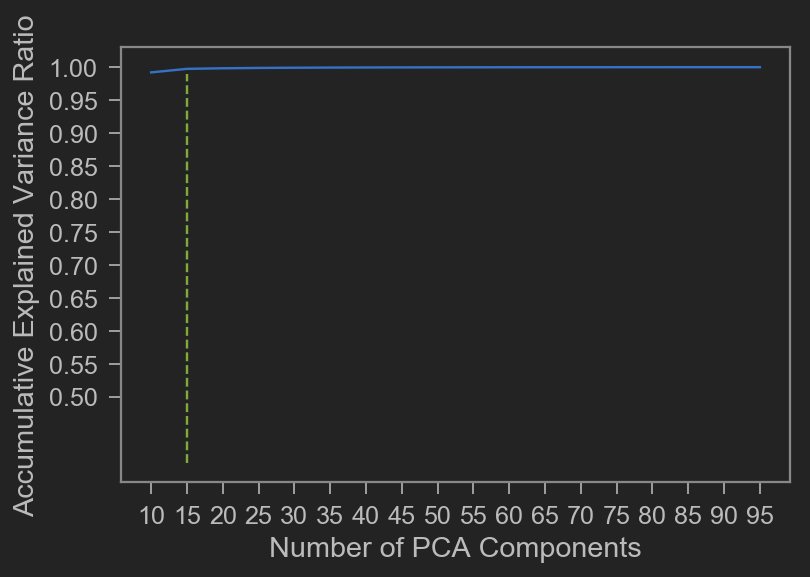

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
n_components = range(10,100,5)
acc_explained_ratio = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit_transform(X)
    acc_explained_ratio.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(6,4),dpi=144)
plt.plot(n_components,acc_explained_ratio)
plt.xlabel("Number of PCA Components")
plt.ylabel("Accumulative Explained Variance Ratio")
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(np.arange(0,100,5))
plt.plot((15,15),(0.4,0.99),"g--")
plt.show()

In [39]:
n_components = 15
pca_model = PCA(n_components=n_components).fit(train_x)
pca_train_x = pca_model.transform(train_x)
pca_test_x = pca_model.transform(test_x)
param_grid = {"C":[1,5,10,50],"gamma":[0.0001,0.0005,0.001,0.005,0.01],
              "kernel":["rbf"],"class_weight":["balanced"]}
SVC_PCA_model = GridSearchCV(SVC(),param_grid,verbose=2,n_jobs=4)
SVC_PCA_model.fit(pca_train_x,train_y)
print("-----SVM Classifier(PCA)------\n",
      "best param:{0}\nbest score:{1}".format(SVC_PCA_model.best_params_,SVC_PCA_model.best_score_))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   54.7s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.5min finished


-----SVM Classifier(PCA)------
 best param:{'C': 50, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
best score:0.79575


In [41]:
y_pred = SVC_PCA_model.best_estimator_.predict(pca_test_x)
print("------Confusion Matrix------\n",confusion_matrix(test_y,y_pred))
print("-----Classification_report-----\n",classification_report(test_y,y_pred))

------Confusion Matrix------
 [[2281  585]
 [  78   56]]
-----Classification_report-----
              precision    recall  f1-score   support

          0       0.97      0.80      0.87      2866
          1       0.09      0.42      0.14       134

avg / total       0.93      0.78      0.84      3000



# K-Means

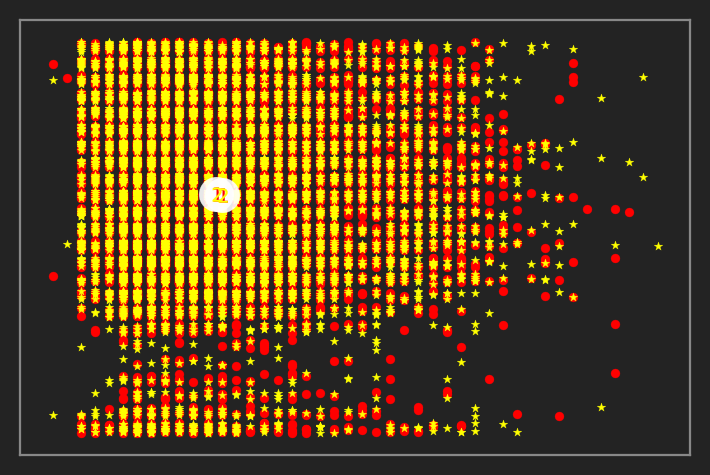

In [39]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(X)
kmean_score = kmean.score(X)

labels = kmean.labels_
centers = kmean.cluster_centers_
plt.figure(figsize=(6,4),dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[labels==0].iloc[:,0],X[labels==0].iloc[:,1],marker="o",s=20,c="red")
plt.scatter(X[labels==1].iloc[:,0],X[labels==1].iloc[:,1],marker="*",s=20,c="yellow")
plt.scatter(centers[:,0],centers[:,1],marker="o",c="white",alpha=0.9,s=300)
plt.scatter(centers[:,0],centers[:,1],marker="$1$",c="red",s=50)
plt.scatter(centers[:,0],centers[:,1],marker="$2$",c="yellow",s=50)

In [40]:
from sklearn.metrics import adjusted_rand_score,homogeneity_score,completeness_score,v_measure_score
AR_score = adjusted_rand_score(y,labels)
H_score = homogeneity_score(y,labels)
C_score = completeness_score(y,labels)
V_score = v_measure_score(y,labels)
print("Adjusted Rand-Index:",AR_score,"\n",
     "Homogeneity Score:",H_score,"\n",
     "Completeness Score:",C_score,"\n",
     "V-measure Score:",V_score)

Adjusted Rand-Index: 0.0027599712496652125 
 Homogeneity Score: 0.01662842545061333 
 Completeness Score: 0.004487396252852615 
 V-measure Score: 0.0070675283307278045


# KNN

------KNeighborsClassifier------
elaspe: 305.2950389313734 
 train_score: 0.9540508947037137 
 test_score: 0.9538834951456311
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]


F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------KNeighborsClassifier------
elaspe: 305.5213248479308 
 train_score: 1.0 
 test_score: 0.953344120819849
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.25      0.01      0.01       171

avg / total       0.92      0.95      0.93      3708

auc: 0.5024998883978394
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3534    3]
 [ 170    1]]
------RadiusNeighborsClassifier------
elaspe: 436.63880084495827 
 train_score: 0.9538710547612624 
 test_score: 0.9538834951456311
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]


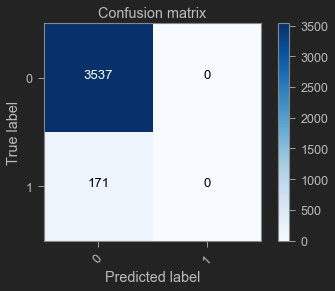

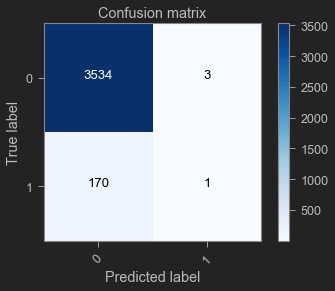

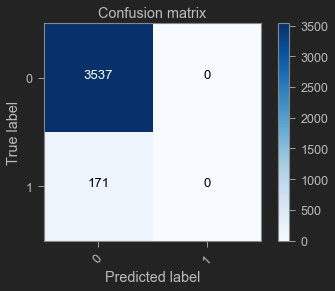

In [29]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors=10)
knn_model2 = KNeighborsClassifier(n_neighbors=10,weights="distance")
knn_model3 = RadiusNeighborsClassifier(n_neighbors=10,radius=1000.0)

models = [knn_model1,knn_model2,knn_model3]
for knn in models:
    start = time.clock()
    knn.fit(train_x,train_y)
    train_score = knn.score(train_x,train_y)
    test_score = knn.score(test_x,test_y)
    y_pred = knn.predict(test_x)
    print("------"+knn.__class__.__name__+"------\n"
          "elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
    cm = confusion_matrix(test_y,y_pred)
    eval_info(test_y,y_pred,y_score,cm)

# naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import time

GNB = GaussianNB()
BNB = BernoulliNB()
# models = [GNB,BNB]
# for NB in models:
start = time.clock()
GNB.fit(train_x,train_y)
train_score = GNB.score(train_x,train_y)
test_score = GNB.score(test_x,test_y)
print("elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
# y_pred = GNB.predict(test_x)
y_pred_prob1 = GNB.predict_proba(test_x)[:,1]

start = time.clock()
BNB.fit(train_x,train_y)
train_score = BNB.score(train_x,train_y)
test_score = BNB.score(test_x,test_y)
print("elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
# y_pred = GNB.predict(test_x)
y_pred_prob2 = BNB.predict_proba(test_x)[:,1]

y_pred_prob = y_pred_prob1 + y_pred_prob2
y_pred = np.where(y_pred_prob>0.5,1,0)

cm = confusion_matrix(test_y,y_pred)
eval_info(NB,test_y,y_pred_prob,cm)